In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

In [2]:
audio_data = 'path'
y, sr = librosa.load(audio_data, sr=44100)
y_harmonic = librosa.effects.harmonic(y)

[Text(0.5, 1.0, 'Chromagram')]

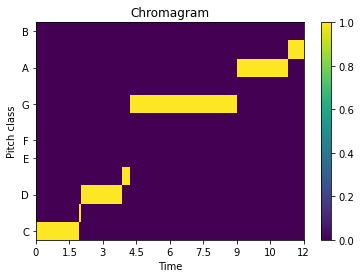

In [3]:
S = np.abs(librosa.stft(y_harmonic, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
normalize = np.where(chroma < 1, 0, 1)
sort = librosa.util.axis_sort(normalize, axis=1, index=False, value=np.argmax)
fig, ax = plt.subplots()
img = librosa.display.specshow(sort, y_axis='chroma', x_axis='time', ax=ax, cmap='viridis')
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

In [4]:
from IPython.display import Audio
Audio(audio_data)

In [5]:
index_list = []
get_index = np.argmax(sort, axis=1)
for iteration_index in range(12):
    if sort[iteration_index, get_index[iteration_index]] == 1:
        index_list.append(1)
    else:
        index_list.append(0)
audio_data_v = np.array(index_list[:12])
print(audio_data_v)    

[1 1 1 1 0 0 0 1 0 1 1 0]


In [6]:
tonalities = {
'C_minor' : np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]),
'C_major' : np.array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]),
'C#_minor' : np.array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]),
'C#_major' : np.array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]),
'D_minor' : np.array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0]),
'D_major' : np.array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]),
'D#_minor' : np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]),
'D#_major' : np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]),
'E_minor' : np.array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]),
'E_major' : np.array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]),
'F_minor' : np.array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]),
'F_major' : np.array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0]),
'F#_minor' : np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
'F#_major' : np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]),
'G_minor' : np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]),
'G_major' : np.array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]),
'G#_minor' : np.array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]),
'G#_major' : np.array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]),
'A_minor' : np.array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]),
'A_major' : np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
'A#_minor' : np.array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]),
'A#_major' : np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]),
'B_minor' : np.array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]),
'B_major' : np.array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]),
}
tonalities_list = list(tonalities.values())
key_list = list(tonalities.keys())
#print(tonalities_list)
#print(key_list)

In [7]:
for i, z in zip(tonalities_list, key_list):
    detect = audio_data_v * i
    print('---------\n' + str(z))
    print(audio_data_v)
    print(str(i) + '\nSimilarity ' + str(np.sum(detect)) + ':' + str(np.sum(audio_data_v)))
    if (np.sum(audio_data_v) - np.sum(detect)) == 0 :
        print('Good!')
    elif (np.sum(audio_data_v) - np.sum(detect)) < 2 :
        print('It happens')
    elif (np.sum(audio_data_v) - np.sum(detect)) >= 2 :
        print('This is not suitable')        

---------
C_minor
[1 1 1 1 0 0 0 1 0 1 1 0]
[1 0 1 1 0 1 0 1 1 0 1 0]
Similarity 5:7
This is not suitable
---------
C_major
[1 1 1 1 0 0 0 1 0 1 1 0]
[1 0 1 0 1 1 0 1 0 1 0 1]
Similarity 4:7
This is not suitable
---------
C#_minor
[1 1 1 1 0 0 0 1 0 1 1 0]
[0 1 0 1 1 0 1 0 1 1 0 1]
Similarity 3:7
This is not suitable
---------
C#_major
[1 1 1 1 0 0 0 1 0 1 1 0]
[1 1 0 1 0 1 1 0 1 0 1 0]
Similarity 4:7
This is not suitable
---------
D_minor
[1 1 1 1 0 0 0 1 0 1 1 0]
[1 0 1 0 1 1 0 1 0 1 1 0]
Similarity 5:7
This is not suitable
---------
D_major
[1 1 1 1 0 0 0 1 0 1 1 0]
[0 1 1 0 1 0 1 1 0 1 0 1]
Similarity 4:7
This is not suitable
---------
D#_minor
[1 1 1 1 0 0 0 1 0 1 1 0]
[0 1 0 1 0 1 1 0 1 0 1 1]
Similarity 3:7
This is not suitable
---------
D#_major
[1 1 1 1 0 0 0 1 0 1 1 0]
[1 0 1 1 0 1 0 1 1 0 1 0]
Similarity 5:7
This is not suitable
---------
E_minor
[1 1 1 1 0 0 0 1 0 1 1 0]
[1 0 1 0 1 0 1 1 0 1 0 1]
Similarity 4:7
This is not suitable
---------
E_major
[1 1 1 1 0 0 0 1 0 1 1 0